# INSERTION SORT VS BUBBLE SORT

This notebook is a comparison between the insertion sort and the bubble sort. The goal is to compare the time complexity of both. __Insertion sort__ and __bubble sort__ are both simple sorting algorithms that are not very efficient for large data sets. However, they are easy to implement and understand.

### Insertion Sort
Insertion sort works the way we sort cards in our hands. It is a comparison-based algorithm that builds a final sorted array one item at a time. It starts with the assumption that the first element is already sorted. Then, it compares the next element with the first element and swaps them if they are in the wrong order. It continues to do this for each element in the array until the entire array is sorted. The time complexity of insertion sort is O(n^2) both in the worst and average case.

### Code Implementation

In [1]:
def insertion_sort(arr):
    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            arr[i + 1] = arr[i] 
            i = i - 1
        arr[i + 1] = key

### Usage example

In [2]:
arr = [5, 2, 4, 6, 1, 3]
insertion_sort(arr)
print(arr)

[1, 2, 3, 4, 5, 6]


### Bubble Sort
Bubble sort compares each pair of adjacent items and swaps them if they are in the wrong order. The name bubble sort comes from the way the largest element "bubbles" to the top of the array. It is not very efficient for large data sets. The time complexity of bubble sort is O(n^2) in the worst and average case.

In [3]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

### Usage example

In [4]:
arr = [5, 2, 4, 6, 1, 3]
bubble_sort(arr)
print(arr)

[1, 2, 3, 4, 5, 6]


## Testing the time complexity
To compare both algorithms we can use different types of arrays. For example, we can use an array that is already sorted, an array that is sorted in reverse order, and an array that is randomly sorted. We can then compare the time (using timeit module) it takes for each algorithm to sort the arrays and plot the results.

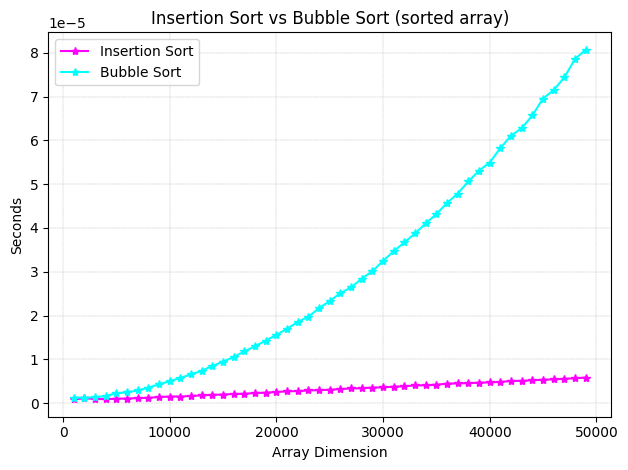

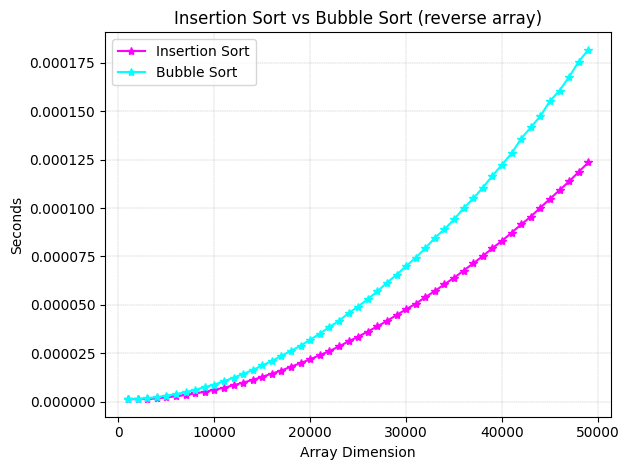

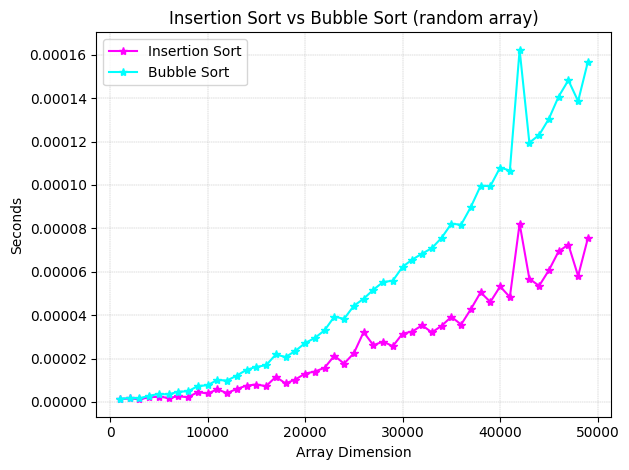

In [5]:
import timeit
import random
import matplotlib.pyplot as plt

# Create an array that is already sorted
def create_sorted_array(n):
    return [i for i in range(n)]

# Create an array that is sorted in reverse order
def create_reverse_sorted_array(n):
    return [i for i in range(n, 0, -1)]

# Create an array that is randomly sorted
def create_random_array(n):
    return [random.randint(0, n) for _ in range(n)]

# Test the time complexity of the algorithms
def test_time_complexity(type_of_array, n, runs):
    insertion_sort_time = []
    bubble_sort_time = []
    array_dimension = []
    
    for i in range(1, runs):
        if type_of_array == 'sorted':
            arr = create_sorted_array(i)
        elif type_of_array == 'reverse':
            arr = create_reverse_sorted_array(i)
        elif type_of_array == 'random':
            arr = create_random_array(i)
        else:
            arr = []
        
        array_dimension.append(i*n)
        array_copy = arr.copy() # Create a copy of the array to test both algorithms with the same array
        
        time_start = timeit.default_timer()
        insertion_sort(array_copy)
        time_end = timeit.default_timer()
        insertion_sort_time.append(time_end - time_start)
        
        time_start = timeit.default_timer()
        bubble_sort(arr)
        time_end = timeit.default_timer()
        bubble_sort_time.append(time_end - time_start)
        
        # plot the results
    plt.plot(array_dimension, insertion_sort_time, color='magenta', linestyle='-', marker='*', label='Insertion Sort')
    plt.plot(array_dimension, bubble_sort_time, color='cyan', linestyle='-', marker='*', label='Bubble Sort')
    plt.xlabel('Array Dimension')
    plt.ylabel('Seconds')
    plt.title(f'Insertion Sort vs Bubble Sort ({type_of_array} array)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
        
def main ():
    test_time_complexity('sorted', 1000, 50)
    test_time_complexity('reverse', 1000, 50)
    test_time_complexity('random', 1000, 50)
    
main()


## Conclusion

Both algorithms have a quadratic time complexity, denoted as $O(n^2)$, as shown in the comparative performance plots. However, Insertion Sort beats Bubble Sort by a small margin. The root cause for the difference is simply based on the  nature of Insertion Sort, which is especially noticeable when handling arrays that have already been sorted or nearly sorted.

Insertion Sort has a best-case time complexity of $O(n)$, which occurs when each element being inserted compares only once and is then placed in the correct position (the array is already sorted). This is because the number of comparisons in Insertion Sort equals the number of array inversions. If the array is already sorted, there are no inversions, and the algorithm performs $n-1$ comparisons.

Bubble Sort's performance is consistent with the array's initial state, with a time complexity of $O(n^2)$ no matter of the array's ordering. The algorithm performs the same number of operations no matter how the array is initially sorted.

As a result, in terms of efficiency, Insertion Sort is a better choice for smaller datasets because of its ability to minimise operations based on the array elements' inherent order.
